<a href="https://colab.research.google.com/github/basmala875/Machine-Learning-Projects/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Basmala Mahrous

ID: 58-24523

Tutorial: 10

---

Name: Fady Emad

ID: 58-7110

Tutorial: 10

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [2]:
df.shape

(20000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ApplicationNumber     20000 non-null  int64 
 1   Age                   20000 non-null  int64 
 2   AnnualIncome          20000 non-null  object
 3   CreditScore           20000 non-null  int64 
 4   EmploymentStatus      16260 non-null  object
 5   EducationLevel        20000 non-null  object
 6   LoanAmount            20000 non-null  object
 7   LoanDuration          20000 non-null  object
 8   MaritalStatus         20000 non-null  object
 9   NumberOfDependents    20000 non-null  int64 
 10  HomeOwnershipStatus   20000 non-null  object
 11  BankruptcyHistory     20000 non-null  int64 
 12  LoanPurpose           20000 non-null  object
 13  PreviousLoanDefaults  20000 non-null  int64 
 14  MonthlyLoanPayment    15660 non-null  object
 15  MonthlyIncome         17160 non-null

In [3]:
df.isnull().sum()

,0
ApplicationNumber,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,3740
EducationLevel,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [18]:
def clean_currency(col):
    # Ensure the column is treated as strings before replacement
    return col.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

df['AnnualIncome'] = clean_currency(df['AnnualIncome'])
df['LoanAmount'] = clean_currency(df['LoanAmount'])
df['MonthlyLoanPayment'] = clean_currency(df['MonthlyLoanPayment'])
df['MonthlyIncome'] = clean_currency(df['MonthlyIncome'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApplicationNumber     20000 non-null  int64  
 1   Age                   20000 non-null  int64  
 2   AnnualIncome          20000 non-null  float64
 3   CreditScore           20000 non-null  int64  
 4   EmploymentStatus      20000 non-null  object 
 5   EducationLevel        20000 non-null  object 
 6   LoanAmount            20000 non-null  float64
 7   LoanDuration          20000 non-null  object 
 8   MaritalStatus         20000 non-null  object 
 9   NumberOfDependents    20000 non-null  int64  
 10  HomeOwnershipStatus   20000 non-null  object 
 11  BankruptcyHistory     20000 non-null  int64  
 12  LoanPurpose           20000 non-null  object 
 13  PreviousLoanDefaults  20000 non-null  int64  
 14  MonthlyLoanPayment    20000 non-null  float64
 15  MonthlyIncome      

In [19]:

df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)
df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-4012259431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyLoanPayment'].fillna(df['MonthlyLoanPayment'].mean(), inplace=True)
/tmp/ipython-input-4012259431.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
ApplicationNumber,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


## Data Cleaning

In [21]:
df['Monthly_Debt_To_Income_Ratio']= df['MonthlyLoanPayment']/ (df['AnnualIncome']/12)
df['Monthly_Debt_To_Income_Ratio']

,Monthly_Debt_To_Income_Ratio
0,0.277020
1,0.667184
2,0.050373
3,0.078151
4,0.261736
...,...
19995,0.148513
19996,0.140664
19997,0.127550
19998,0.229230


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

/tmp/ipython-input-428889827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rates.index, y=approval_rates['ApprovalRate'], palette='viridis')


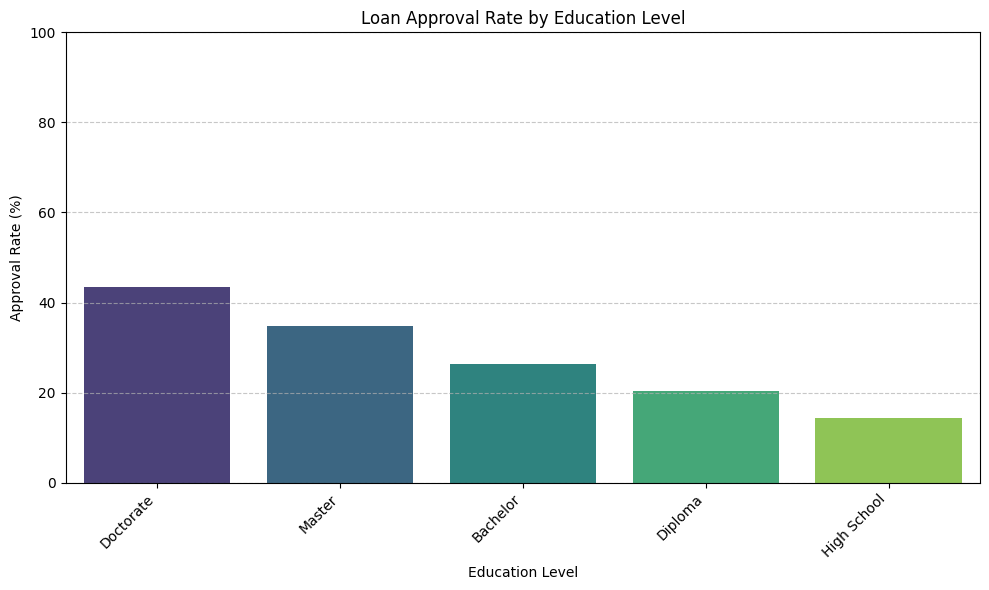

Loan Approval Rates by Education Level:
 LoanApproved    ApprovalRate
EducationLevel              
Doctorate          43.501048
Master             34.885246
Bachelor           26.428807
Diploma            20.327219
High School        14.319567


In [12]:
approval_rates = df.groupby('EducationLevel')['LoanApproved'].value_counts(normalize=True).unstack()
approval_rates['ApprovalRate'] = approval_rates.get('Yes', 0) * 100
approval_rates = approval_rates.sort_values(by='ApprovalRate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=approval_rates.index, y=approval_rates['ApprovalRate'], palette='viridis')
plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate (%)')
plt.ylim(0, 100) # Set y-axis limit to 0-100 for percentages
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Loan Approval Rates by Education Level:\n", approval_rates[['ApprovalRate']])

**Answer for Q1**: Your answer here

**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

**Answer for Q2**: Your answer here

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

**Answer for Q3**: Your answer here

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

**Answer for Q4**: Your answer here

## Data Preparation for Modelling

## Modelling

## Evaluation

## Bonus (Optional)